

# Project: Investigate a Dataset (TMDb Movie Data Set)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
 **Overview**
>I selected the TMDb movie data set  as my data for this investigation. This data set contains information about 10,000 movies collected from The Movie Database (TMDb). This information includes the movie ID, cast, budget, genre of the movie, amongst others. My goal is to analyse this data by asking and providing answers to certain questions that can help relate to the data better.

**Possible Questions to be Analyzed**
>Question 1: Who are the most popular cast in the data set?

>Question 2: What is the most popular movie genre?

>Question 3: What movies are most popular?

>Question 4: What are the most profitable movies?

>Question 5: Does popularity of the movie correlated with profit? Is it true that a popular film will make a lot of money?

**Packages for the investigation**
>Numpy

>Pandas

>Matplotlib

>Seaborn

In [1]:
# importing statements for all of the packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, i will load in the data, check for cleanliness, and then trim and clean my dataset for analysis.

### General Properties

In [2]:
# Loading data . 
df =pd.read_csv('tmdb-movies.csv')


#   types and look for instances of missing or possibly errant data.


### Displaying first five rows of data for overview

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Performing operations to inspect data...


#### Displaying the number columns and rows of data for overview

In [4]:
df.shape

(10866, 21)

#### Displaying the statistical overview of the data

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#### Displaying an overview of the column data types and counts:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

>From th above information we can observe that this data has some missing input in the dataset. therefore, we will proceed to the next step to clean and organize the data.


### Data Cleaning 



#### Dropping the column that we will not be analyzing. 
These are: id, imdb_id, budget_adj, revenue_adj, homepage, keywords, overview, vote_count and vote_average.

In [7]:
df.drop(['imdb_id','homepage', 'tagline', 'keywords','overview','runtime', 'id'], axis=1, inplace=True)

#### Check if there are duplicate  data 

In [8]:
sum(df.duplicated())

1

#### There is one duplicated column. we are going to remove the duplicate of the column. 

##### Dropping duplicate data

In [9]:
df.drop_duplicates(keep= 'first',inplace = True)

#### confirm if the duplicate data was removed

In [10]:
sum(df.duplicated())

0

#### Viewing column for missing data

In [11]:
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

#### Cleaning missing data
##### Dropping missing data column

In [12]:
df.dropna(inplace=True)

#### Confirming that missing columns have been removed

In [13]:
df.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [14]:
df.head()

,popularity,budget,revenue,original_title,cast,director,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            9772 non-null   float64
 1   budget                9772 non-null   int64  
 2   revenue               9772 non-null   int64  
 3   original_title        9772 non-null   object 
 4   cast                  9772 non-null   object 
 5   director              9772 non-null   object 
 6   genres                9772 non-null   object 
 7   production_companies  9772 non-null   object 
 8   release_date          9772 non-null   object 
 9   vote_count            9772 non-null   int64  
 10  vote_average          9772 non-null   float64
 11  release_year          9772 non-null   int64  
 12  budget_adj            9772 non-null   float64
 13  revenue_adj           9772 non-null   float64
dtypes: float64(4), int64(4), object(6)
memory usage: 1.1+ MB


### Histogram display 

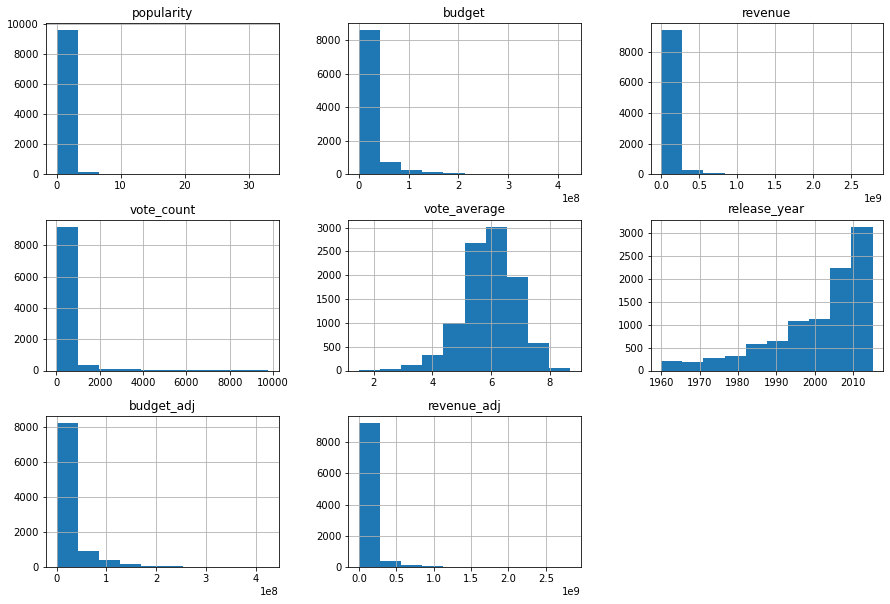

In [16]:
df.hist(figsize=(15,10));

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 ( Who are the most popular cast in the data set?) 
Some features, such as cast and genre, contain multiple characters, which are separated in each column by a '|'. We will first divide those characters and arrange them in descending order, with the first element being the most frequently occurring.

In [17]:
def divide(col_name):
    #this will separates with '|' in a column
    divide = df[col_name].str.cat(sep = '|')
    divide = pd.Series(divide.split('|'))
    frequency = divide.value_counts(ascending = False)
    
    return frequency

Splitting the cast column and Plotting bar chart to display the first ten most popular cast

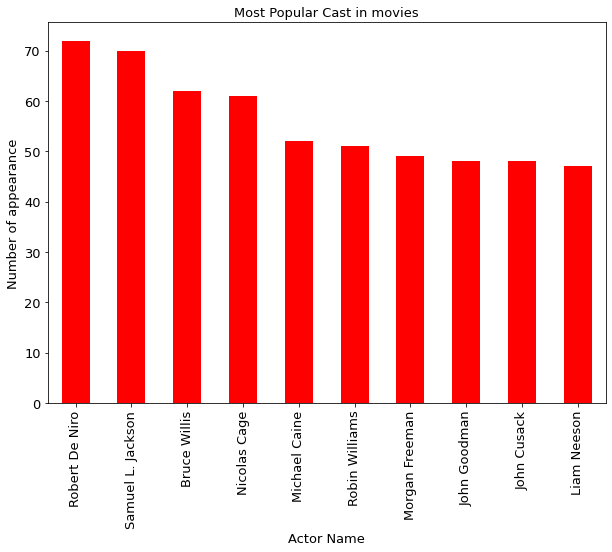

In [18]:
cast = divide('cast')
Most_Popular_Cast = cast.head(10)

column_bar = Most_Popular_Cast.plot.bar(color = 'red', fontsize = 13)
column_bar.figure.set_size_inches(10, 7);
#labels
plt.title('Most Popular Cast in movies', color = 'black', fontsize = '13')
plt.xlabel('Actor Name', color = 'black', fontsize = '13')
plt.ylabel('Number of appearance', color = 'black', fontsize = '13');

>The above plot shows that most popular cast in the data set is Robert De Niro. Part of the top ten in decending order are Samuel L Jackson, Bruce Will, Nicolas Cage, Micheal Caine and others as shown above.

### Research Question 2  (What is the most popular movie genre?)


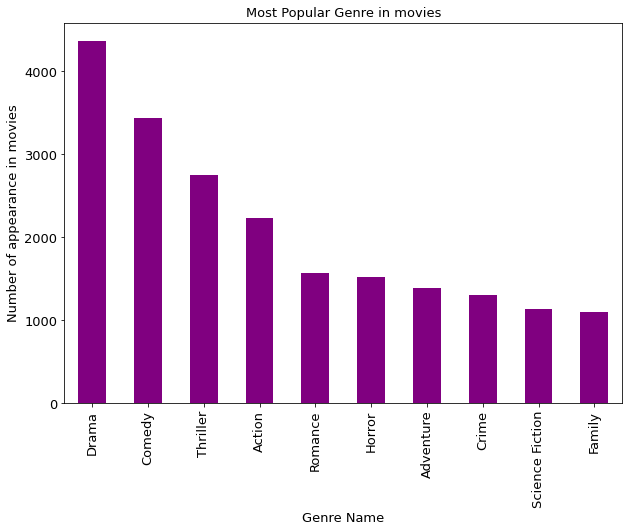

In [23]:
genre = divide('genres')
Most_Popular_Genre = genre.head(10)
column_bar =Most_Popular_Genre.plot.bar(color = 'purple', fontsize = 13)
column_bar.figure.set_size_inches(10, 7);
plt.title('Most Popular Genre in movies', color = 'black', fontsize = '13')
plt.xlabel('Genre Name', color = 'black', fontsize = '13')
plt.ylabel('Number of appearance in movies', color = 'black', fontsize = '13');

>The above plot shows that the most popular genre is Drama.Part of the top 10 in descending order are Comedy, Thriller, Action, Romance and others as shown above.

### Research Question 3  (What movies are most popular?)

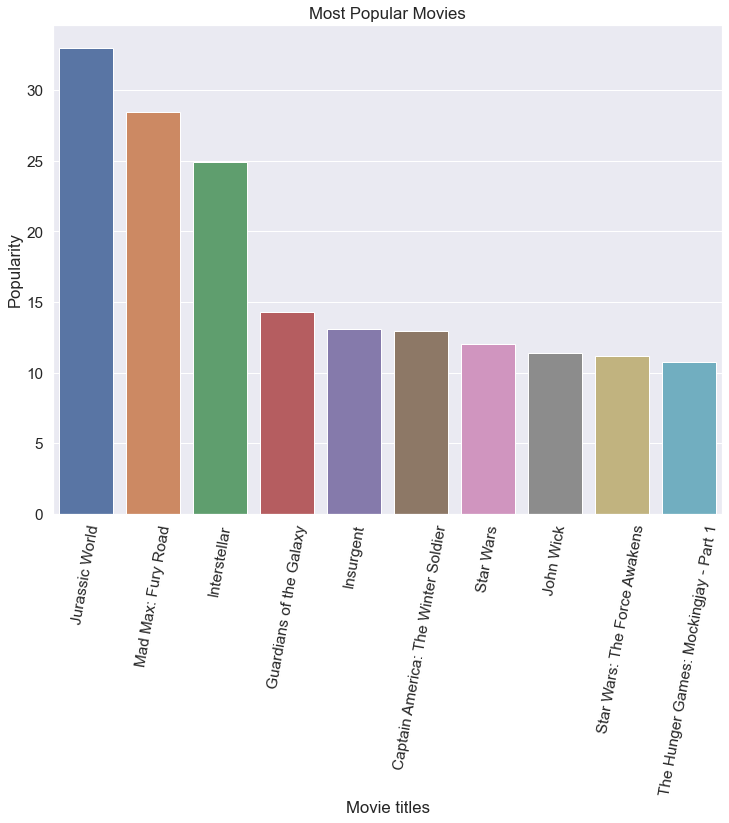

In [25]:
most_popular_movies = df[['original_title','popularity']]
sns.set(rc={'figure.figsize':(12,9)}, font_scale=1.4)

ax = sns.barplot(
   x = most_popular_movies.sort_values(by="popularity", ascending=False).head(10).original_title, 
   y = most_popular_movies.sort_values(by="popularity", ascending=False).head(10).popularity)

for item in ax.get_xticklabels():
    item.set_rotation(80)
    
ax.set(xlabel='Movie titles', ylabel='Popularity', title = 'Most Popular Movies')
plt.show()

>The above plot shows that the most popular movie is Jurassic World.

   ### Research Question 4  (What are the most profitable movies?)  

First calculate the profit made and create a column for it

In [26]:
df.insert(2,'profit_made',df['revenue']-df['budget'])

confirm if column has been added

In [27]:
df.head()

,popularity,budget,profit_made,revenue,original_title,cast,director,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1363528810,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,228436354,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,185238201,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,1868178225,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1316249360,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Plot the most profitable movies

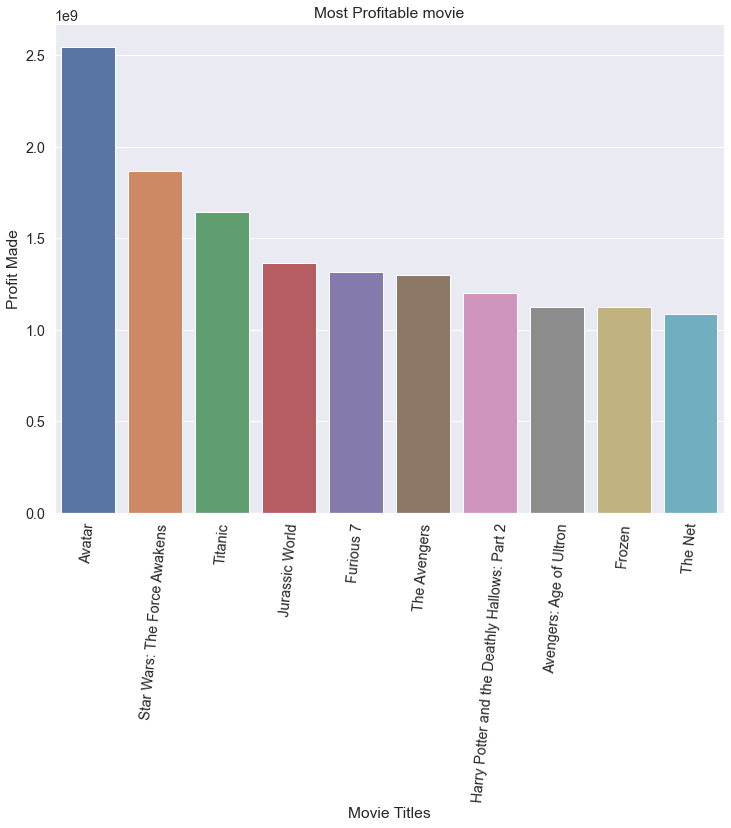

In [29]:
Profitable_Movies= df[['original_title','profit_made']]

sns.set(rc={'figure.figsize':(12,9)}, font_scale=1.3)
ax = sns.barplot(
   x = Profitable_Movies.sort_values(by = "profit_made", ascending=False).head(10).original_title, 
   y = Profitable_Movies.sort_values(by = "profit_made", ascending=False).head(10).profit_made)

for item in ax.get_xticklabels():
    item.set_rotation(80)
    

ax.set(xlabel='Movie Titles', ylabel='Profit Made', title = 'Most Profitable movie')
plt.show()

>The above plot shows that the most profitable movie is Avatar.

  ### Research Question 5 (Does popularity of the movie correlated with profit?) Is it true that a popular film will make a lot of money?

<AxesSubplot:title={'center':'Correlation between profit and popularity (Profit > 100,000,000)'}, xlabel='profit_made', ylabel='popularity'>

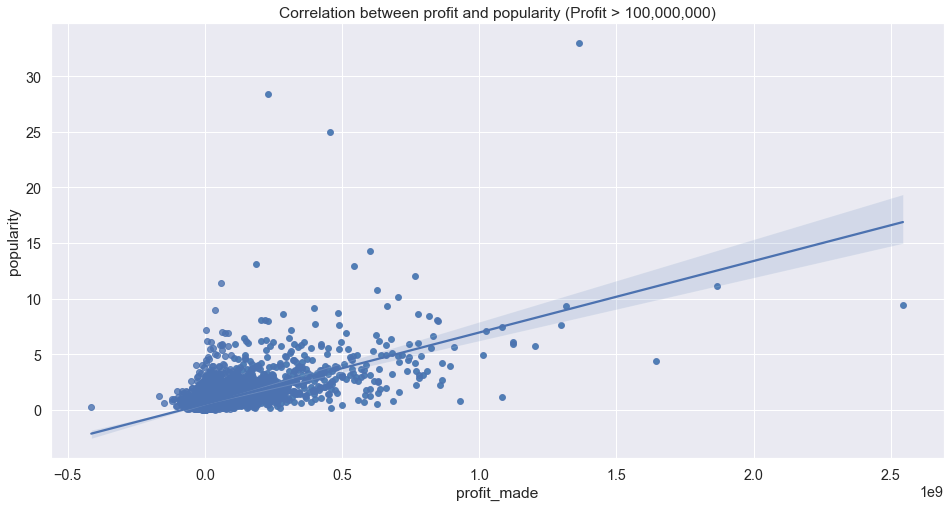

In [30]:
ax = df[df['profit_made'] > 100000000].plot(x='profit_made', y='popularity', kind='scatter', 
      title='Correlation between profit and popularity (Profit > 100,000,000)', color='c', figsize=(16,8),)

sns.regplot(x=df['profit_made'], y=df['popularity'])

>The scatter plot above shows a trend that indicate a positive correlation between the two variables. This indicate that there is a positive relationship between popularity of the movie and the profitablity of the movie. 

In [31]:
correlation = df['profit_made'].corr(df['popularity'])

correlation 

0.629353579194461

> Correlation between profit made and popularity is slightly strong. 

<a id='conclusions'></a>
## Conclusions
**After the investigation, the following conclusion is derived from the questions asked:**
> •The most popular movie cast is Robert De niro, followed by Samuel L. Jackson and Bruce Wilis.

> •The most popular genre is Drama, following by Comedy and Thriller.

> •The most popular movie is Jurassic World, followed by Mad Max - Fury Road, Interstellar

> •The most profitable movies in the dataset are Avatar, Star Wars : The Force Awakens, Titanic and then Jurassic World.

> •Popularity and profit have a slightly strong positive correlation. This means that in most cases, the popularity of a film does not automatically translate into higher profits, and vice versa (e.g Avatar which wasn't listed among the top 10 popular movies but was the most profitable). However, popularity is still a factor that influences profit, as a few popular films, such as Jurassic World and Star Wars: The Force Awakens, were discovered to be among the top ten profitable films.

### Limitations
>•The analysis is limited to the data provided. A large number of columns and rows were also removed. As a result, we cannot confidently state that our outcome is error-free.

>• For simpler parsing during the exploration phase, I divided the data into lists using '|' throughout the data cleaning procedure. The calculation time increases as a result of this.

>•The data provided did not include information on each movie's profit, but it did include information about its revenue and budget, so I computed it by subtracting the budget from revenue.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])